<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [8]</a>'.</span>

In [1]:
from parcels import FieldSet
from glob import glob
import xarray as xr

INFO: Compiled ParcelsRandom ==> /tmp/parcels-729666/libparcels_random_37b7dd0a-08d9-42d1-bde3-a9833d1fd024.so


In [2]:
#local
#path = "/home/tknoop/gits/parcels_test/data/fullcop_data/MetO-NWS-PHY-hi-CUR/2019/01/*.nc"
#nesh
#path =  "/gxfs_work1/geomar/smomw529/2022_north-sea_oysters/data/ocean/MetO-NWS-PHY-hi-CUR/2019/01/*.nc"

#open via xarray
#ds = xr.open_mfdataset(path)
#ds

In [3]:
#select only down to 100m water depth
#ds.isel(depth=slice(0, 13))

In [4]:
variables = {'U': 'uo',
             'V': 'vo'}
dimensions = {'lat': 'lat',
              'lon': 'lon',
              'time': 'time',
              'depth' : 'depth'
              }
#only load data down to 100m
indices =  {'depth' : range(0,13)}

#generate fieldset from xarray
#fieldset = FieldSet.from_xarray_dataset(ds.isel(depth=slice(0, 13)),variables,dimensions)
#del ds
#fieldset.get_fields()

In [5]:
#fieldset.V.show(depth_level=3)

In [6]:
#generate fieldset directly from files via parcels 
import os


def test_fieldset(year,month):
    
    path =  f"/gxfs_work1/geomar/smomw529/2022_north-sea_oysters/data/ocean/MetO-NWS-PHY-hi-CUR/{year}/{month}/*.nc"
    file_list = glob(path) #get list of filenames in specified month_directory
#sort by the last 8 digits (start date)
#file_list = sorted(file_list, key=lambda i: int(os.path.splitext(os.path.basename(i))[0][-8:]))
    file_list = sorted(file_list)


    testfield = FieldSet.from_netcdf(file_list, variables, dimensions, indices = indices)
    testfield.V.show(depth_level=3)
#    print(path)
    return

In [7]:
#testfield.V.show(depth_level=12)

<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

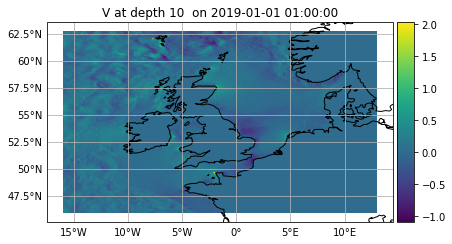

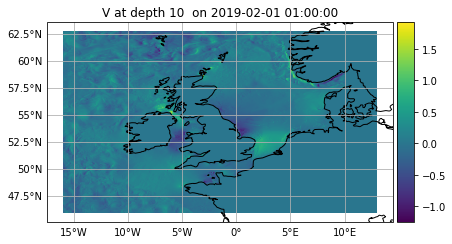

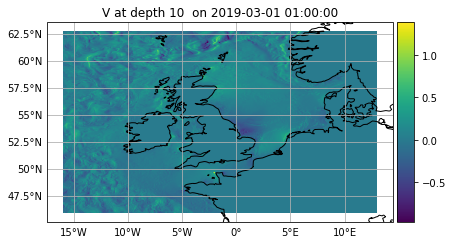

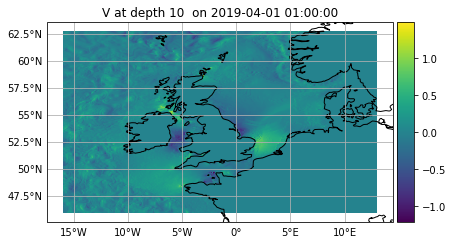

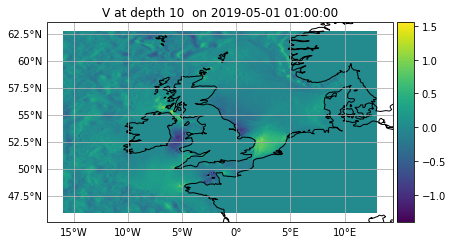

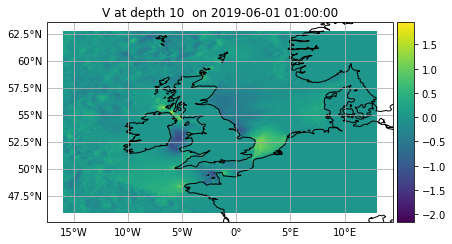

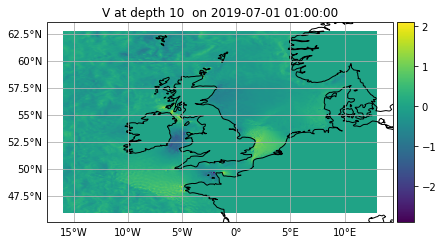

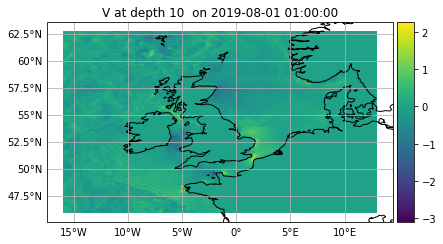

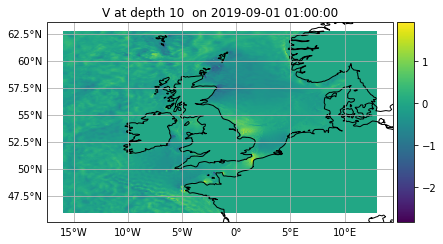

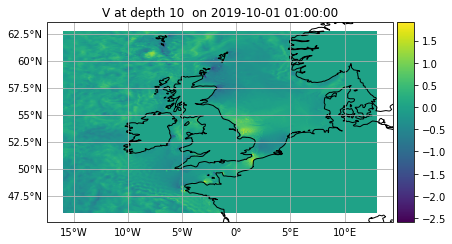

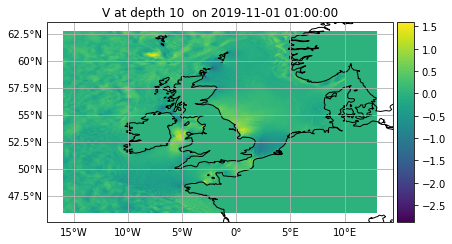

         It will be opened with no decoding. Filling values might be wrongly parsed.


RuntimeError: NetCDF: HDF error

In [8]:
for y in [2019,2020,2021,2022]:
    for m in range(12):
        month = str(m+1)
        if m<=8:
            month = '0'+str(m+1)
        
        test_fieldset(y,month)